# Jonathan Halverson
# Friday, April 1, 2016
# Binomial approximation to Poisson

### The binomial distribution is a good approximation to the Poisson for np=lambda for large n.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

In [2]:
from scipy.stats import binom
from scipy.stats import poisson

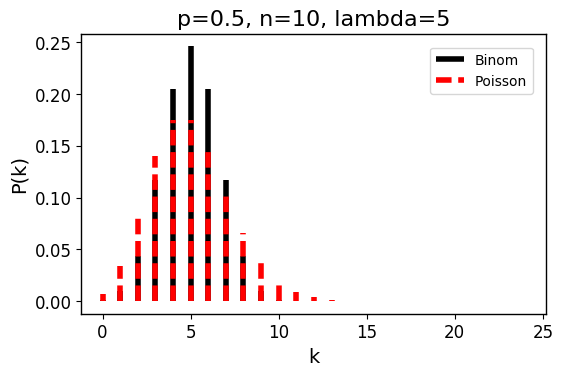

In [3]:
# mu = n * p for normal approx to binomial
x = range(25)
plt.vlines(x, ymin=0, ymax=[binom.pmf(k, p=0.5, n=10) for k in x], lw=4, label='Binom')
plt.vlines(x, ymin=0, ymax=[poisson.pmf(k, 5) for k in x], linestyle='dashed', colors='r', lw=4, label='Poisson')
plt.legend()
plt.title('p=0.5, n=10, lambda=5')
plt.xlabel('k')
plt.ylabel('P(k)')

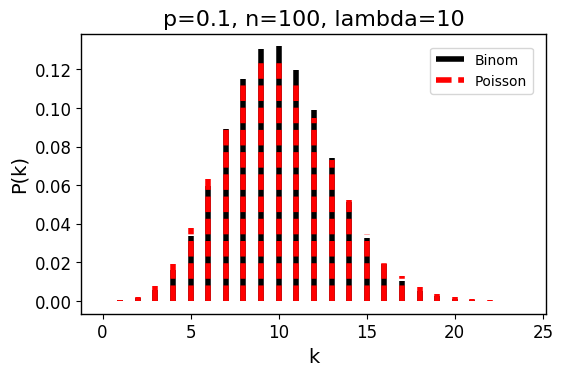

In [4]:
plt.vlines(x, ymin=0, ymax=[binom.pmf(k, p=0.1, n=100) for k in x], lw=4, label='Binom')
plt.vlines(x, ymin=0, ymax=[poisson.pmf(k, 10) for k in x], linestyle='dashed', colors='r', lw=4, label='Poisson')
plt.legend()
plt.title('p=0.1, n=100, lambda=10')
plt.xlabel('k')
plt.ylabel('P(k)')

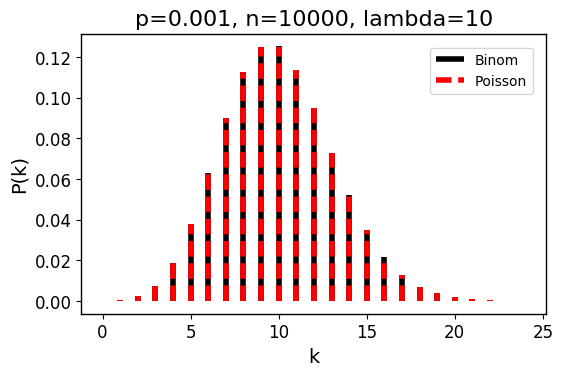

In [5]:
plt.vlines(x, ymin=0, ymax=[binom.pmf(k, p=0.001, n=10000) for k in x], lw=4, label='Binom')
plt.vlines(x, ymin=0, ymax=[poisson.pmf(k, 10) for k in x], linestyle='dashed', colors='r', lw=4, label='Poisson')
plt.legend()
plt.title('p=0.001, n=10000, lambda=10')
plt.xlabel('k')
plt.ylabel('P(k)')

In [6]:
def mse(n, p):
    error_sq = 0.0
    for k in xrange(n + 1):
        error_sq += (poisson.pmf(k=k, mu=n*p) - binom.pmf(k=k, p=p, n=n))**2
    return error_sq / float(n)

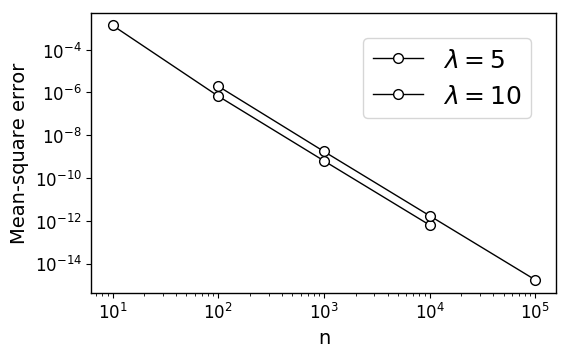

In [7]:
n_values = np.array([100, 1000, 10000, 100000])
plt.loglog(n_values / 10, [mse(n, p) for n, p in zip(n_values / 10, [0.5, 0.05, 0.005, 0.0005])], 'k-', marker='o', mfc='w', label=r'$\lambda=5$')
plt.loglog(n_values, [mse(n, p) for n, p in zip(n_values, [0.1, 0.01, 0.001, 0.0001])], 'k-', marker='o', mfc='w', label=r'$\lambda=10$')
plt.legend(fontsize=18)
plt.xlabel('n')
plt.ylabel('Mean-square error')

The Poission distribution describes the number of events within a given time window. The lambda parameter is the rate. The events must be indepedent. Examples include the number of heart attacks in NYC on a given day, the number of weddings, and the number of Prussian soldiers who died by being kicked by a horse in a given time window.